In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [6]:
cols = ["a1", "a2", "a3", "a4", "a5", "a6", "a7", "output"]
df = pd.read_csv("diagnosis.csv", names = cols)
df.drop(index = [0], axis = 0, inplace = True)

In [7]:
df.head()


,a1,a2,a3,a4,a5,a6,a7,output
1,35.5,0,1,0,0,0,0,0
2,35.9,0,0,1,1,1,1,0
3,35.9,0,1,0,0,0,0,0
4,36.0,0,0,1,1,1,1,0
5,36.0,0,1,0,0,0,0,0


In [8]:
df.isnull().sum()

a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
output    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1 to 120
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      120 non-null    float64
 1   a2      120 non-null    int64  
 2   a3      120 non-null    int64  
 3   a4      120 non-null    int64  
 4   a5      120 non-null    int64  
 5   a6      120 non-null    int64  
 6   a7      120 non-null    int64  
 7   output  120 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 8.4 KB


In [10]:
df.describe()

,a1,a2,a3,a4,a5,a6,a7,output
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.724167,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.819132,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df["a1"] = df["a1"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1 to 120
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a1      120 non-null    int64
 1   a2      120 non-null    int64
 2   a3      120 non-null    int64
 3   a4      120 non-null    int64
 4   a5      120 non-null    int64
 5   a6      120 non-null    int64
 6   a7      120 non-null    int64
 7   output  120 non-null    int64
dtypes: int64(8)
memory usage: 8.4 KB


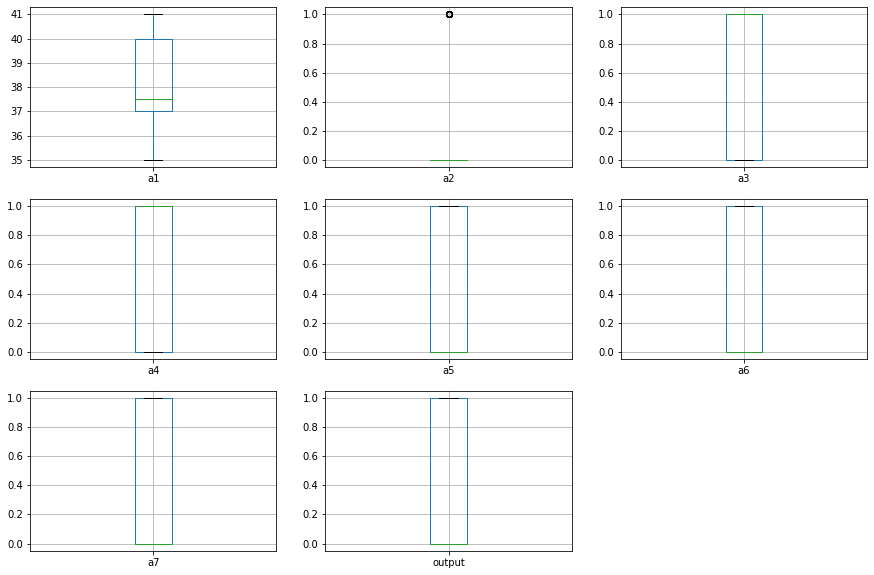

In [17]:
plt.figure(figsize = (15, 10))
numerical = df.columns
for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")


In [18]:
df.a2.unique()

array([0, 1], dtype=int64)

In [20]:
df = df.drop("a2", axis = 1)

In [21]:
df.head()

,a1,a3,a4,a5,a6,a7,output
1,35,1,0,0,0,0,0
2,35,0,1,1,1,1,0
3,35,1,0,0,0,0,0
4,36,0,1,1,1,1,0
5,36,1,0,0,0,0,0


In [24]:
x = df.drop("output", axis = 1)
y = df["output"]

In [25]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear", random_state = 0)

logreg.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = logreg.predict(xtest)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

1.0